Question 1

In [ ]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import warnings

print("Harish P")
print("21BBS0204")

Harish P
21BBS0204


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    df = pd.read_csv('/content/Arima.csv', parse_dates=['Date'], index_col='Date')

In [ ]:
print("Harish P")
print("21BBS0204")

df['price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

Harish P
21BBS0204


In [ ]:
df['MA_50'] = df['price'].rolling(window=50).mean()
df['MA_200'] = df['price'].rolling(window=200).mean()
df['MA_365'] = df['price'].rolling(window=365).mean()
df['MA_500'] = df['price'].rolling(window=500).mean()
print(df[['price', 'MA_50', 'MA_200', 'MA_365', 'MA_500']].tail(10))

             price    MA_50     MA_200      MA_365    MA_500
Date                                                        
2017-10-16  437.05  421.136  358.14375  285.142466  250.0366
2017-10-13  424.80  421.148  358.94250  285.741507  250.5908
2017-10-12  420.15  421.111  359.72275  286.340959  251.1774
2017-10-11  415.50  421.005  360.46275  286.923288  251.7414
2017-10-10  423.60  421.025  361.24000  287.570548  252.3233
2017-10-09  425.60  421.135  362.07675  288.259178  252.9110
2017-10-06  424.85  421.516  362.91175  288.955890  253.4870
2017-10-05  423.30  421.880  363.73425  289.650274  254.0546
2017-10-04  423.55  422.303  364.55825  290.336438  254.6500
2017-10-03  416.00  422.584  365.37125  291.006849  255.2281


In [ ]:
print("Harish P")
print("21BBS0204")

model = auto_arima(df['price'], seasonal=False, stepwise=True, trace=True)
print(model.summary())

Harish P
21BBS0204
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=14174.801, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=13645.892, Time=0.90 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.26 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=14172.801, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=13496.711, Time=1.63 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=13382.235, Time=2.62 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=13338.003, Time=3.81 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=13272.135, Time=7.07 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=15.69 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.54 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=13270.138, Time=0.86 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=13336.006, Time=1.70 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.23 sec
 ARIMA(4,2,1)(0,0,0)[0]      

In [ ]:
print("Harish P")
print("21BBS0204")

Harish P
21BBS0204


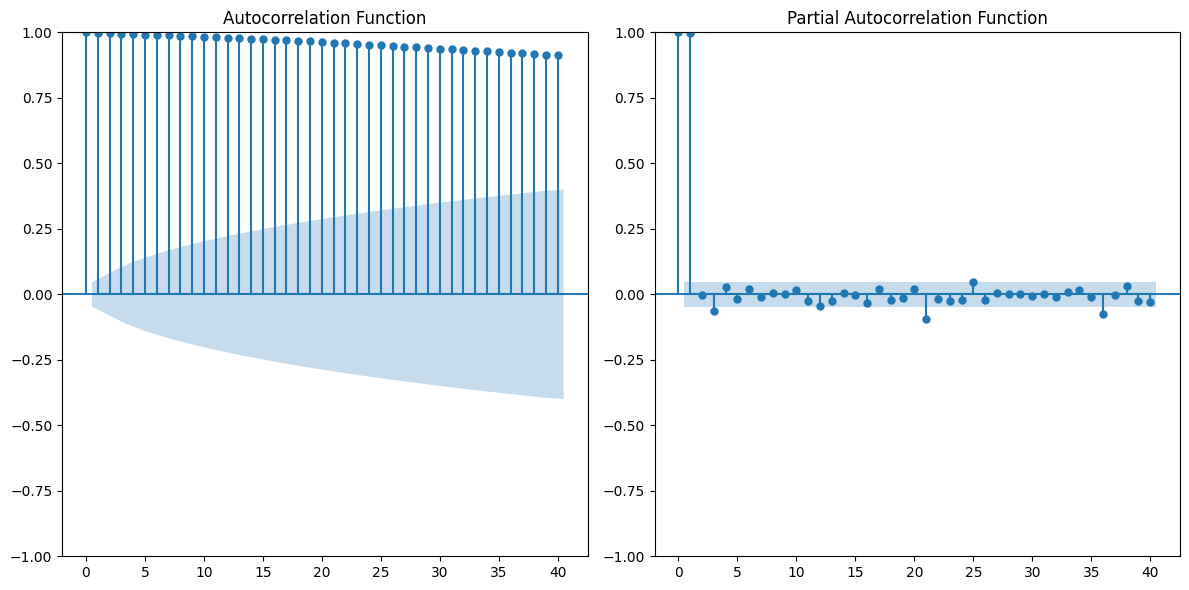

Autocorrelation Summary:
ACF Significant Lags: {0: 1.0, 1: 0.9983982291380649, 2: 0.9967951241382028, 3: 0.9949916278564795, 4: 0.9932856125939786, 5: 0.9915080110519444, 6: 0.9898057220910925, 7: 0.9880654157431292, 8: 0.9863517945157644, 9: 0.9846306520891407, 10: 0.9829706977721224, 11: 0.9812222303131685, 12: 0.9793379578044391, 13: 0.9773604299498848, 14: 0.9753865108286757, 15: 0.9734004781709039, 16: 0.9713117269375822, 17: 0.9692878092078567, 18: 0.9671885150193712, 19: 0.9650635265418472, 20: 0.9629893435435386, 21: 0.9606298960461906, 22: 0.9582132443922122, 23: 0.9556740316545642, 24: 0.9530772447956622, 25: 0.95061703452889, 26: 0.9480946102712946, 27: 0.9455965149759918, 28: 0.943095594259691, 29: 0.9406114428439473, 30: 0.9381020360277613, 31: 0.9355996182721186, 32: 0.933051269462655, 33: 0.9305102128071296, 34: 0.9279980809595108, 35: 0.9254623431970388, 36: 0.9226832597540289, 37: 0.9199143094081543, 38: 0.9171999036585198, 39: 0.9144266451361582, 40: 0.911585766349975

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df['price'].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(1, 2, 2)
plot_pacf(df['price'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

acf_values = acf(df['price'].dropna(), nlags=40)
pacf_values = pacf(df['price'].dropna(), nlags=40)
lags = range(len(acf_values))

def summarize_autocorrelations(acf_values, pacf_values, lags):
    summary = {
        'ACF': {},
        'PACF': {}
    }

    for lag in range(len(lags)):
        if abs(acf_values[lag]) > 0.2:
            summary['ACF'][lags[lag]] = acf_values[lag]
        if abs(pacf_values[lag]) > 0.2:
            summary['PACF'][lags[lag]] = pacf_values[lag]

    return summary

autocorrelation_summary = summarize_autocorrelations(acf_values, pacf_values, lags)
print("Autocorrelation Summary:")
print("ACF Significant Lags:", autocorrelation_summary['ACF'])
print("PACF Significant Lags:", autocorrelation_summary['PACF'])

Question 2

In [ ]:
print("Harish P")
print("21BBS0204")

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings

Harish P
21BBS0204


In [ ]:
df = pd.read_csv('/content/Logistic.csv')
df.head(2)

,CGPA,GRE_Score,TOEFL_Score,Research_Papers,Projects,Internships,Admitted
0,9.2,332,118,3,7,4,1
1,8.7,321,109,1,4,2,1


In [ ]:
x =df.drop(columns =['Admitted'],axis =1)
y=df.Admitted

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 130)

In [ ]:
print("Harish P")
print("21BBS0204")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    log = LogisticRegression()
    log.fit(x_train,y_train)

Harish P
21BBS0204


In [ ]:
pred = log.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

0.9259259259259259

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
Admitted,,
0,10,1
1,1,15


In [ ]:
print("Harish P")
print("21BBS0204")

print(classification_report(y_test,pred))

Harish P
21BBS0204
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.94      0.94      0.94        16

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



In [ ]:
intercept = log.intercept_[0]
coefficients = log.coef_[0]

print("The Logit Function is: ")
logit_function = (
    f"logit(p) = {intercept:.4f} + "
    f"{coefficients[0]:.4f} * CGPA + "
    f"{coefficients[1]:.4f} * GRE + "
    f"{coefficients[2]:.4f} * TOEFL + "
    f"{coefficients[3]:.4f} * Researchs + "
    f"{coefficients[4]:.4f} * Projects + "
    f"{coefficients[5]:.4f} * Internships"
)
print(logit_function)

The Logit Function is: 
logit(p) = -0.1057 + 0.2360 * CGPA + -0.1263 * GRE + 0.3487 * TOEFL + -0.2192 * Researchs + 0.1285 * Projects + 0.5381 * Internships


In [ ]:
print("Harish P")
print("21BBS0204")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    new_entry = [[9.39, 322, 113, 1, 5, 1]]

    probability = log.predict_proba(new_entry)[:, 1]
    print(f"Predicted Probability: {probability[0]:.4f}")

Harish P
21BBS0204
Predicted Probability: 0.8578


In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    for index, row in x_test.iterrows():
        probability = log.predict_proba([row.values])[:, 1]
        print(f"Predicted Probability for entry {index}: {probability[0]:.4f}")


Predicted Probability for entry 73: 0.2202
Predicted Probability for entry 6: 0.9570
Predicted Probability for entry 70: 0.6958
Predicted Probability for entry 52: 0.7862
Predicted Probability for entry 43: 0.3438
Predicted Probability for entry 105: 0.8937
Predicted Probability for entry 86: 0.0892
Predicted Probability for entry 99: 0.8680
Predicted Probability for entry 26: 0.1015
Predicted Probability for entry 37: 0.2202
Predicted Probability for entry 35: 0.0568
Predicted Probability for entry 49: 0.2906
Predicted Probability for entry 42: 0.9435
Predicted Probability for entry 107: 0.0568
Predicted Probability for entry 3: 0.9313
Predicted Probability for entry 46: 0.6915
Predicted Probability for entry 57: 0.9398
Predicted Probability for entry 83: 0.1295
Predicted Probability for entry 54: 0.9852
Predicted Probability for entry 28: 0.7368
Predicted Probability for entry 85: 0.2906
Predicted Probability for entry 33: 0.9352
Predicted Probability for entry 18: 0.9869
Predicted P